# Basic usage - load folder context and use the default pipeline

In [2]:
%matplotlib inline
from lightroot.detection import preprocessing
from lightroot.context import context
c = context.folder_context("C:/Users/mrsir/Box Sync/CYCB-GFP/cut/April 4 (cut run 192)",77,81)
c["show_progress"] = False
#c["transforms"] = False
c.run()
#c._iom.try_make_video()
#replot some frames using the data and re-make video e.g. remove annoying vector artifact

The directory ./cached_datax should be empty. Do you want to clear it? (y/n)y
23/07/2018 06:14:08 INFO:Setting a default value noise_trange:[0.01, 0.045]
23/07/2018 06:14:08 INFO:Setting a default value max_files:10000
23/07/2018 06:14:08 INFO:Setting a default value max_file_gap:100
23/07/2018 06:14:08 INFO:Setting a default value stack_file_format:C:/Users/mrsir/Box Sync/CYCB-GFP/cut/April 4 (cut run 192)\Run0192_tp{:0>3}.tif
23/07/2018 06:14:08 INFO:Data dir is set to C:/Users/mrsir/Box Sync/CYCB-GFP/cut/April 4 (cut run 192)
23/07/2018 06:14:08 INFO:Output dir is set to ./cached_datax
23/07/2018 06:14:08 INFO:Total_files:973
23/07/2018 06:14:08 INFO:Total_tiff_files:973
23/07/2018 06:14:08 INFO:Max_good_index:484
23/07/2018 06:14:08 INFO:First_good_index:0
23/07/2018 06:14:08 INFO:Frame_gaps:{}
23/07/2018 06:14:08 INFO:***********BEGIN PROCESSING LOOP***********
23/07/2018 06:14:08 INFO:loading settings file ./settings.json
23/07/2018 06:14:18 INFO(77):running stage denoise
23/07/2

# Run the tracker only
There is usually a data.csv or data.csv.cpt file to use in the cache. 

In [3]:
from lightroot.tracking import tpctree
from lightroot import plots
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math
%matplotlib inline
result = tpctree.process_file("./cached_datax/data.csv",start=0,end=5,options={"transforms":True, "epsilon":18, "use_tr_concensus": True})
#plot the result and the angles etc.
#should try to plot the proposal transforms somewhere like a rose plot with a score - a scatter plot centered at 0 could do this
#then we should check the center of gravity of the giant cluster and check its score - how often is this better than the others
#using the translations, how often can we improve the score with the transformations - also plot their scatter plot

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 10.17it/s]


In [4]:
result.stats#.groupby("best_tr_type").count()

,best_tr_angle,best_tr_disp,best_tr_score,best_tr_type,detections_ratio,marriage_angles
0,-0.000,"[1.0, 0.0, 0.0]",1.50,random_tr,"[2, 2]","[{'key': 0, 'angle': -0.0}, {'key': 3, 'angle'..."
1,123.855,"[-3.0, -4.0, 2.0]",14.25,random_tr,"[1, 4]","[{'key': 4, 'angle': nan}, {'key': 5, 'angle':..."
2,-90.000,"[0.0, 4.0, 0.0]",0.00,random_tr,"[1, 1]","[{'key': 5, 'angle': -90.0}]"
3,-90.000,"[0.0, 4.0, 1.0]",14.25,random_tr,"[1, 4]","[{'key': 7, 'angle': nan}, {'key': 5, 'angle':..."


In [ ]:
# result = tpctree.process_file("./cached_datax/data.csv",start=0,end=50,options={"transforms":False, "epsilon":18, "use_tr_concensus": True})
# withconc = pd.DataFrame([result.stats[k] for k in result.stats.keys()])
# #withconc["best_tr"].plot()
# result = tpctree.process_file("./cached_datax/data.csv",start=0,end=50,options={"transforms":False, "epsilon":18, "use_tr_concensus": False})
# without = pd.DataFrame([result.stats[k] for k in result.stats.keys()])
# joined = without.join(withconc,rsuffix="with")[["best_tr", "best_trwith"]]#[0:10].plot()
# joined["diff"] = joined["best_tr"]- joined["best_trwith"]
# joined["diff"].plot()

In [ ]:
result.stats.iloc[0]

In [ ]:
result.plot_transition(t=1,transform_seed=None)

In [ ]:
result.plot_transition(t=0,transform_seed=np.array([[10],[9]]))

In [ ]:
eps = 18
marriages = np.array([[10,9], [11,10], [0,0],[1,1], [12,11], [9,8], [7,7],[5,4],[4,5],[3,3],[6,6],[2,2]])
scores = tpctree.translations_from_marriages(result[0],result[1],mar=marriages,name="handpicked")
scores.head()

In [ ]:
crowd_tr, score = tpctree.concensus_best_from_scores(result[0],result[1], scores, eps=eps)
rand_scores = tpctree.translations_from_marriages(result[0],result[1],name="random")
scores = pd.concat([scores,rand_scores])
#pass in a plot and flip the y
plots.plot_proposal(result[0],result[1],crowd_tr)

In [ ]:
#plots
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
matplotlib.rcParams.update({'font.size': 14})
mini, maxi = 0, eps  # or use different method to determine the minimum and maximum to use
norm = plt.Normalize(mini, maxi)

fig, (ax) = plt.subplots(1, 1, figsize=(12, 8), tight_layout=True)
colour = "Blues"
#s = scores.plot(kind='scatter', x="x", y="y", s = 30, c = "score",  marker = "x", cmap=colour,ax=ax, label="Arbitrary transforms")
s = ax.scatter(scores["x"], scores["y"], s = 30, c = scores["score"],  marker = "x", cmap=colour, label="Arbitrary transforms")
scores[scores["type"]=="handpicked"].plot(kind='scatter', x="x", y="y", s = 100, c = "score", facecolors='none', edgecolors='b',  
                                          cmap=colour,ax=ax,colorbar=False, label="Handpicked inlier transforms")

ax.scatter(x=[crowd_tr.ref_vector[0]], y=[crowd_tr.ref_vector[1]], s=150, facecolors='red', edgecolors='w', marker='o',cmap=colour, label="Concensus transform")
ax.axvline(x=0, ymin=0.25, ymax=0.75)
ax.axhline(y=0, xmin=0.25, xmax=0.75)
zoom = 50
ax.set_ylim(-zoom,zoom)
ax.set_xlim(-zoom,zoom)

#general treatment
ax.set_xticklabels([])
ax.set_yticklabels([])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cb = plt.colorbar(s,cax)
#cb.set_label('Score', rotation=270)
cb.ax.tick_params(labelsize=12)

ax.legend()
#animate this guy for supps - can we see a pattern of red movements - make sure to fix the scale!
#-different shapes for types including "selected"

,angle
key,
0,-0.000000
3,36.699225


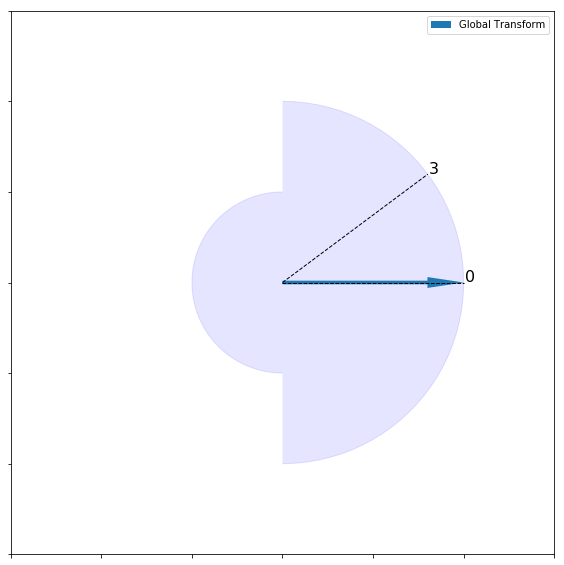

In [9]:
entry = result.stats.iloc[0]
angles = pd.DataFrame(entry["marriage_angles"]).set_index("key").dropna()#[0:5]
plots.plot_disp_angles(entry["best_tr_angle"], angles.values, angles.index)
angles

In [ ]:
#show the changing angles
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML
fig,ax = plt.subplots(1,1,figsize=(10,10))
def update(t):
    entry = result.stats.iloc[t]
    angles = pd.DataFrame(entry["marriage_angles"]).set_index("key").dropna()#[0:5]
    ax.clear()
    plot_disp_angles(entry["best_tr_angle"], angles.values, angles.index,ax=ax)
    ax.set_title("Frame"+str(t)) 
ani = matplotlib.animation.FuncAnimation(fig, update, frames=len(result.stats))
ok = HTML(ani.to_html5_video())
#ani.save('./samples/angles.mp4', fps=1)

# Pipelines
The run method can take a collection of "pipe" functions to build more flexible pipelines. Image processing can be a nuisance and this architecture is supposed to help.

The idea is that the "pipe" function signature is consitently 

In [ ]:
def pipe(image, context, properties):
    #do something to the image
    return image

If every pipeline function has this sig, they can all be unit tested and chained together by the context manager. They should not all trip over each other re-computing things but share resources.

The context stores global image properties that can be determined up front. See inside context where the analysis.set_frame_statistics is called. 

This could be extended to add more frame metrics that are "read-only" with respect to the frame. The empty pipeline is passed in the example below and this will simply read frames, analyse frames and save them to the output dir without any processing or modification

In [ ]:
#the empty pipeline simply analyses images
c.run([])

Custom pipelines can transform images from one state to another. If no argument is passed to the run method, the default pipeline tries to build the point cloud from the data and track individuals